# Filtro automatizado de SPAM en SMS

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import os

In [8]:
os.getcwd()

'd:\\GIAP\\Giordan\\Giordan\\GitHub\\MLA\\Proyecto 02 - Filtro de SPAM'

### Cargar la data

SMS Spam Collection: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [9]:
messages = pd.read_csv('SMSSpamCollection.csv', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


¿Qué tan largos son los mensajes?

In [10]:
messages['length'] = messages['message'].apply(lambda text: len(text))
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


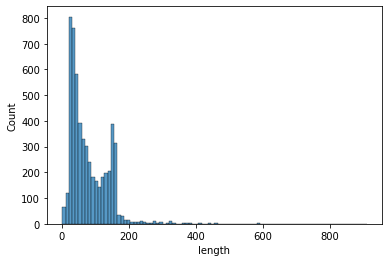

In [14]:
sns.histplot(data = messages, x = 'length')
# sns.displot(data = messages, x = 'length')

In [15]:
messages.describe()

,length
count,5572.000000
mean,80.490309
std,59.944527
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


¿Hay alguna diferencia entre las longitudes de mensajes *ham* y *spam*?

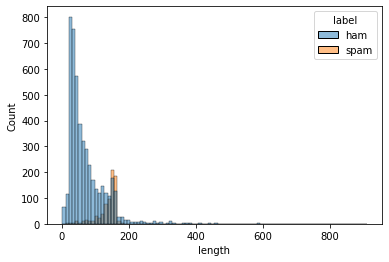

In [16]:
sns.histplot(data = messages, x = 'length', hue = 'label')

### Preprocesamiento

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer()

### Entrenar el modelo

Los métodos de Naive Bayes suelen tener muy buena performance para este tipo de tareas dado que los vectores de features contienen frecuencias
- GaussianNB
- MultinomialNB 
- BernoulliNB

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
classifier = MultinomialNB()

### Evaluación de resultados